## use PyTorch to build CNN model

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# define the CNN model with 3 CNN layers and 2 FCN layers
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # 32 filters, 3x3 kernel
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)  # 64 filters, 3x3 kernel
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)  # 128 filters, 3x3 kernel
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(-1, 128 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [3]:
# train the model
def train_model(model, device, trainloader, criterion, optimizer):
    model.train()
    total_loss = 0
    for data in trainloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(trainloader)
    return avg_loss

In [4]:
# test the model
def test_model(model, device, testloader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(testloader)
    accuracy = correct / total
    return avg_loss, accuracy

In [5]:
# define the transformations to be applied to the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [6]:
# load the CIFAR-10 dataset and apply the transformations
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
# create data loaders for training and testing
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [8]:
# create the model, loss function, and optimizer
model = CustomCNN()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Using device: cuda


In [9]:
train_losses = []
test_losses = []

EPOCHS = 30
for epoch in range(EPOCHS):
    train_loss = train_model(model, device, trainloader, criterion, optimizer)
    test_loss, test_accuracy = test_model(model, device, testloader, criterion)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print(f'Epoch {epoch + 1}/{EPOCHS}: train loss={train_loss:.4f}, test loss={test_loss:.4f}, test accuracy={test_accuracy:.4f}')

Epoch 1/30: train loss=2.2672, test loss=2.1200, test accuracy=0.2544
Epoch 2/30: train loss=1.9263, test loss=1.7722, test accuracy=0.3588
Epoch 3/30: train loss=1.6710, test loss=1.5719, test accuracy=0.4294
Epoch 4/30: train loss=1.5039, test loss=1.4565, test accuracy=0.4760
Epoch 5/30: train loss=1.4028, test loss=1.3367, test accuracy=0.5200
Epoch 6/30: train loss=1.3229, test loss=1.2671, test accuracy=0.5420
Epoch 7/30: train loss=1.2497, test loss=1.2089, test accuracy=0.5649
Epoch 8/30: train loss=1.1843, test loss=1.1430, test accuracy=0.5929
Epoch 9/30: train loss=1.1191, test loss=1.0928, test accuracy=0.6135
Epoch 10/30: train loss=1.0609, test loss=1.0564, test accuracy=0.6267
Epoch 11/30: train loss=1.0118, test loss=1.0179, test accuracy=0.6406
Epoch 12/30: train loss=0.9575, test loss=0.9655, test accuracy=0.6612
Epoch 13/30: train loss=0.9164, test loss=0.9455, test accuracy=0.6695
Epoch 14/30: train loss=0.8784, test loss=0.9235, test accuracy=0.6739
Epoch 15/30: tr

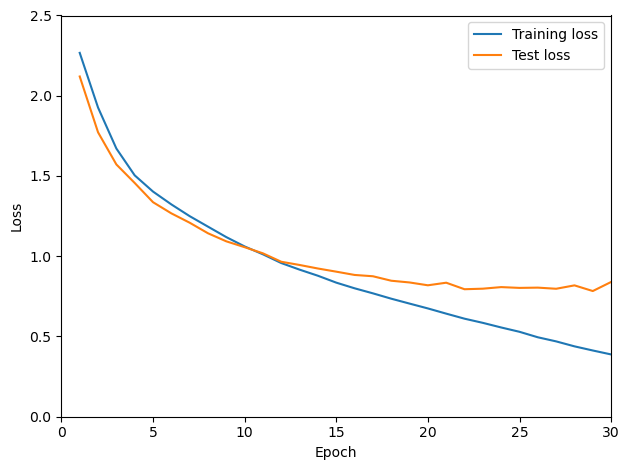

In [12]:
# plot training and test losses
plt.plot(range(1, EPOCHS + 1), train_losses, label='Training loss')
plt.plot(range(1, EPOCHS + 1), test_losses, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.title('training loss and test loss')
plt.legend()
plt.axis([0, EPOCHS, 0, 2.5])
plt.tight_layout()